In [1]:
import pandas as pd
import pandas_datareader 
import datetime
import pandas_datareader.data as web
import numpy as np
import warnings
import ipywidgets as widgets
from IPython.display import display


In [2]:
tick_list = ['AAL','AAPL','ADBE','ADI','ADP','ADSK','ALXN','AMZN','BIIB','BMRN',
        'CSX','CTRP','CTSH','DISH','EXPE','GILD','GOOG','GOOGL','INCY','ISRG',
        'JBHT','LBTYA','LBTYK','MAR','MAT','MDLZ','WYNN','XRAY','REGN','IDXX','MYL','PCLN','SIRI','MNST']

In [3]:
xls = pd.ExcelFile('NASDAQ.xlsx')
for ticker in tick_list:
    exec('{} = pd.DataFrame()'.format(ticker))
    exec("{} = xls.parse('{}', index_col= 'Date',parse_dates=True)".format(ticker,ticker))    

In [4]:
GILD.head()

,Ticker,Return on Assets,Asset Turnover
Date,,,
2007-09-30,GILD,32.564204,0.852772
2007-12-31,GILD,32.325696,0.849934
2008-03-31,GILD,30.380218,0.826893
2008-06-30,GILD,29.622877,0.813926
2008-09-30,GILD,30.989182,0.835568


In [5]:
frames = [AAL,AAPL,ADBE,ADI,ADP,ADSK,ALXN,AMZN,BIIB,BMRN,
        CSX,CTRP,CTSH,DISH,EXPE,GILD,GOOG,GOOGL,INCY,ISRG,
        JBHT,LBTYA,LBTYK,MAR,MAT,MDLZ,WYNN,XRAY,REGN,IDXX,MYL,PCLN,SIRI,MNST]

result = pd.concat(frames,join='inner', ignore_index=False,axis=1)

In [6]:
result.head()

,Ticker,Return on Assets,Asset Turnover,Ticker,Return on Assets,Asset Turnover,Ticker,Return on Assets,Asset Turnover,Ticker,...,Asset Turnover,Ticker,Return on Assets,Asset Turnover,Ticker,Return on Assets,Asset Turnover,Ticker,Return on Assets,Asset Turnover
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-30,AAL,1.975656,0.758417,AAPL,16.610033,1.168073,ADBE,12.134811,0.518965,ADI,...,0.383387,PCLN,12.789151,1.147492,SIRI,-33.719443,0.550048,MNST,35.031742,2.120730
2007-12-31,AAL,1.746483,0.794754,AAPL,17.055065,1.153202,ADBE,12.397960,0.540908,ADI,...,0.478998,PCLN,14.976838,1.219615,SIRI,-35.257412,0.664240,MNST,33.193608,1.997238
2008-03-31,AAL,0.279625,0.791304,AAPL,18.687940,1.283888,ADBE,14.216611,0.604516,ADI,...,0.489411,PCLN,15.105313,1.255483,SIRI,-30.169390,0.664579,MNST,32.216999,1.873551
2008-06-30,AAL,-5.716693,0.792281,AAPL,18.370588,1.262039,ADBE,14.862242,0.610575,ADI,...,0.656708,PCLN,12.803212,1.283150,SIRI,-115.149630,0.284180,MNST,30.751387,1.786858
2008-09-30,AAL,-6.507631,0.848114,AAPL,20.046192,1.228227,ADBE,15.003789,0.632593,ADI,...,0.472139,PCLN,13.685846,1.415404,SIRI,-116.088153,0.363560,MNST,16.538379,1.582592


In [7]:
df = pd.read_excel('result.xlsx',sheetname="Q3 2007")

In [8]:
# Simalrity measure with equally wieghted variables
def similarity_measure(x):
    df['Similarity Measure'] = x*df['Return on Assets'] + (1-x)*df['Asset Turnover']

similarity_measure(0.5)
df.head()

,Ticker,Return on Assets,Asset Turnover,Similarity Measure
0,AAL,1.975656,0.758417,1.367036
1,AAPL,16.610033,1.168073,8.889053
2,ADBE,12.134811,0.518965,6.326888
3,ADI,14.411176,0.657201,7.534188
4,ADP,3.962953,0.281041,2.121997


In [9]:
#for ticker in tick_list:
sr_list = [] # list of sharpe ratios according to the tickers we are analyzing
for ticker in tick_list:
    stock_data = web.DataReader(ticker,data_source='google',start=datetime.date(2007,7,1),end=datetime.date(2007,9,30))
    returns_data = np.log(stock_data['Close'] / stock_data['Close'].shift(1)) * 100
    returns_data = returns_data.dropna()
    average_return  = returns_data.mean() 
    rf_rate = 4.76/100
    excess_return = average_return - rf_rate/4
    std_returns = returns_data.std()
    sharpe_ratio = excess_return/std_returns
    sr_list.append(sharpe_ratio)
df['Sharpe Ratio'] = sr_list  
df.head()

,Ticker,Return on Assets,Asset Turnover,Similarity Measure,Sharpe Ratio
0,AAL,1.975656,0.758417,1.367036,NaN
1,AAPL,16.610033,1.168073,8.889053,0.127993
2,ADBE,12.134811,0.518965,6.326888,0.095481
3,ADI,14.411176,0.657201,7.534188,NaN
4,ADP,3.962953,0.281041,2.121997,-0.095357


In [10]:
# Unfortunately Google API doesn't have historical prices from some of the stocks
# I have removed these tickers according to the quarters 

df.dropna(axis=0, how='any',inplace=True)
df.head()

,Ticker,Return on Assets,Asset Turnover,Similarity Measure,Sharpe Ratio
1,AAPL,16.610033,1.168073,8.889053,0.127993
2,ADBE,12.134811,0.518965,6.326888,0.095481
4,ADP,3.962953,0.281041,2.121997,-0.095357
5,ADSK,19.831259,1.152953,10.492106,0.034380
6,ALXN,-27.636721,0.215726,-13.710498,0.186444


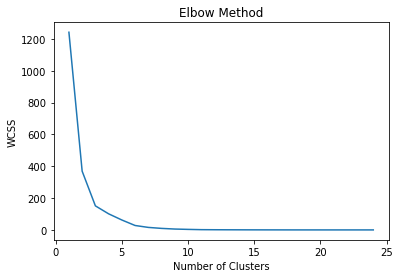

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
wcss = []
X = df.iloc[:,3:5].values              
for i in range(1,len(df.index)):
    kmeans = KMeans(n_clusters=i,init = 'k-means++', max_iter = 300,n_init =10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,len(df.index)),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=100000,n_init=10,random_state=20)
cluster_pred = kmeans.fit_predict(X)

In [13]:
cluster_pred

array([1, 3, 0, 1, 2, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 3, 3, 0, 3, 2,
       3, 3])

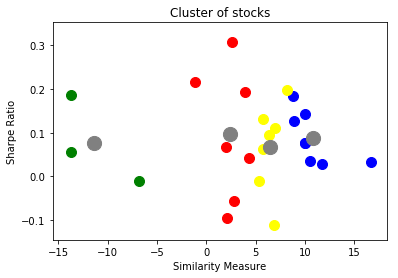

In [14]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s =100, color = 'red', label = 'Cluster 1')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s =100, color = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s =100, color = 'green', label = 'Cluster 3')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s =100, color = 'yellow', label = 'Cluster 4')
#plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], s =100, color = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s =200, color = 'grey', label = 'Centroids')
plt.xlabel('Similarity Measure')
plt.ylabel('Sharpe Ratio')
plt.title('Cluster of stocks')
plt.show()

In [15]:
df['Cluster'] = cluster_pred
new_index = list(range(1,len(df.index)))
df = df.reindex(index=new_index,method='pad')
df                

,Ticker,Return on Assets,Asset Turnover,Similarity Measure,Sharpe Ratio,Cluster
1,AAPL,16.610033,1.168073,8.889053,0.127993,1
2,ADBE,12.134811,0.518965,6.326888,0.095481,3
3,ADBE,12.134811,0.518965,6.326888,0.095481,3
4,ADP,3.962953,0.281041,2.121997,-0.095357,0
5,ADSK,19.831259,1.152953,10.492106,0.034380,1
6,ALXN,-27.636721,0.215726,-13.710498,0.186444,2
7,AMZN,8.775811,2.735251,5.755531,0.130788,3
8,BIIB,7.428542,0.368908,3.898725,0.192367,0
9,BMRN,-2.471544,0.190163,-1.140691,0.215218,0
10,CSX,5.274066,0.395950,2.835008,-0.057304,0


In [16]:
shortlist_stocks = []
for i in range(0,4):
    index = df[df['Cluster']==i]['Sharpe Ratio'].idxmax()
    shortlist_stocks.append(df.loc[index].values)
shortlist_stocks = pd.DataFrame(shortlist_stocks, columns=['Ticker', 'Return on Asset','Asset Turnover','Similarity Measure','Sharpe Ratio','Cluster'])
shortlist_stocks

,Ticker,Return on Asset,Asset Turnover,Similarity Measure,Sharpe Ratio,Cluster
0,BMRN,-2.471544,0.190163,-1.140691,0.215218,0
1,ISRG,16.887372,0.701989,8.794681,0.183686,1
2,ALXN,-27.636721,0.215726,-13.710498,0.186444,2
3,AMZN,8.775811,2.735251,5.755531,0.130788,3
